In [1]:
import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
import BayesianGit.BayesianOptimiser2.BOPackage as BOPackage

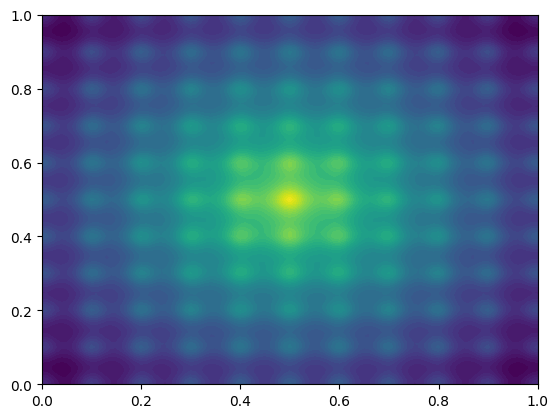

In [2]:
def ObjectiveFunction(X):
    x1 = 10 * (X[0] - 0.5)
    x2 = 10 * (X[1] - 0.5)

    return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)
 

X1 = np.linspace(0, 1, 101, endpoint=True)
X2 = np.linspace(0, 1, 101, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.vstack([X1_grid.ravel(), X2_grid.ravel()]).T

result = np.empty([len(X1), len(X2)])

for i, x1 in enumerate(X1):
    for j, x2 in enumerate(X2):
        result[i, j] = ObjectiveFunction([x1, x2])

plt.contourf(X1, X2, result, levels=50)

In [3]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.07

AcquisitionFunction = BOPackage.UCB
max_kappa = 10
min_kappa = 1

bounds = np.array([[0, 1], [0, 1]])
n_samples = 100

In [4]:
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=BOPackage.UCB, 
                  bounds=bounds, 
                  n_samples=n_samples,
                #   dynamic_bounds=True,
                #   iterations_between_reducing_bounds=2,
                #   first_reduce_bounds=3,
                #   reduce_bounds_factor=0.5,
                  #log_path=log_path,
                  random_seed=23)

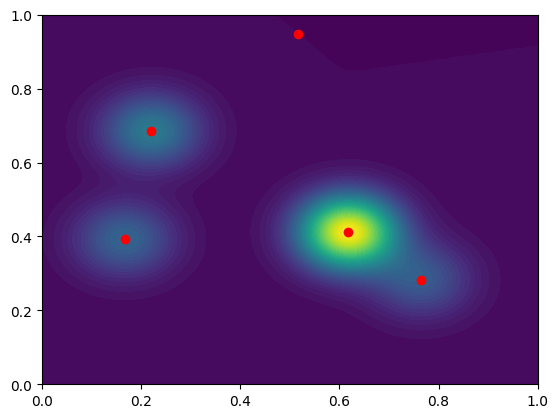

In [5]:
raw_X = bo.GetRandomXBatch(batch_size=5)

raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)
    
bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)

plt.contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
plt.scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

After 65 Simulations:


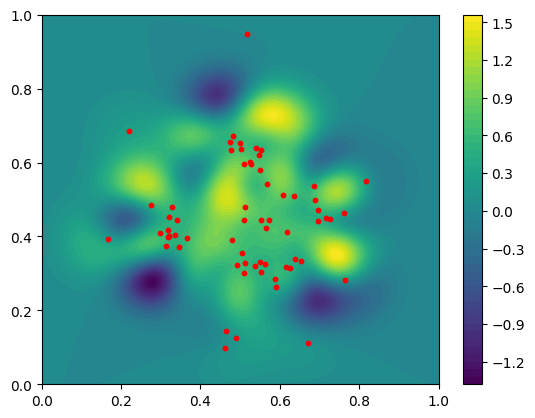

In [6]:
# raw_X = np.array([0.2,0.3])

iterations = 2
for i in range(iterations):
    raw_X = bo.GetNextXBatch(batch_size=30, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_Y = np.empty([len(raw_X), 1])
    for i, x in enumerate(raw_X):
        raw_Y[i, 0] = ObjectiveFunction(x)

    bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
contour = plt.contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)  # Store the contour plot object
plt.scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red', s=10)

plt.colorbar(contour)  # Add color scale based on the contour plot

print(f"After {len(bo.X_data)} Simulations:")

In [9]:
raw_X = np.array([np.array([0.2,0.3])])
mean, variance = bo.PredictMeanVariance(raw_X)

raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)
    
bo.UpdateData(raw_X, raw_Y)

print(mean)

[[0.34925347]]
